# Dendrometer class example

A class for processing high-frequency dendrometer measurements of tree stems.

This code accompanies the paper:

"Tree Growth, Contraction, and Recovery: Disentangling Soil and Atmospheric Drought Effects"  
Erez Feuer, Yakir Preisler, Eyal Rotenberg, Dan Yakir and Yair Mau  
Plant, Cell & Environment (2025)  

The methods section gives a detailed description of the algorithms used in this class.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dendro import dendro

In [2]:
# load the sample data
df = pd.read_csv('sample_dbh.csv', index_col='time', parse_dates=True)
df

,dbh
time,
2018-01-01 00:00:00,9.365369
2018-01-01 00:30:00,9.379297
2018-01-01 01:00:00,9.400600
2018-01-01 01:30:00,9.411251
2018-01-01 02:00:00,9.425777
...,...
2019-12-31 21:30:00,23.305927
2019-12-31 22:00:00,23.303989
2019-12-31 22:30:00,23.306894


## Visual inspection

<Axes: xlabel='time', ylabel='DBH variation (mm)'>

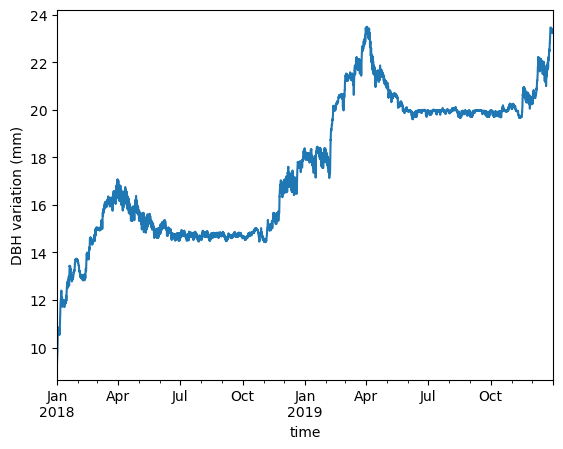

In [3]:
df['dbh'].plot(ylabel='DBH variation (mm)')


## Instantiate the class

In [4]:
tree = dendro(df['dbh'], 
              units='mm',                   # default is 'mm'
              metric='circumference',       # default is 'diameter'
              initial_diameter_in_mm=188,   # default is 0
              points_per_day=48,            # default is 48
              )

The function `df_all` returns a pandas dataframe with all the metrics that are calculated in the dendrometer class. 

In [5]:
df_all = tree.df_all(days_in_window=45)
df_all

,original_data,data,na_flags,trend,GRO,TWD,GRO_rate,rolling_dbh_slope,TREX,omega,TREX_slope,increasing_GRO
time,,,,,,,,,,,,
2018-01-01 00:00:00,190.981090,190.981090,False,191.046129,191.046129,0.000000,2.164332e-02,0.040239,0.0,0.565217,0.073123,True
2018-01-01 00:30:00,190.985523,190.985523,False,191.047793,191.047793,0.000000,2.164332e-02,0.040197,0.0,0.565217,0.073123,True
2018-01-01 01:00:00,190.992304,190.992304,False,191.049482,191.049482,0.000000,2.164332e-02,0.040155,0.0,0.565217,0.073123,True
2018-01-01 01:30:00,190.995694,190.995694,False,191.051788,191.051788,0.000000,2.164332e-02,0.040111,0.0,0.565217,0.073123,True
2018-01-01 02:00:00,191.000318,191.000318,False,191.054222,191.054222,0.000000,2.164332e-02,0.040066,0.0,0.565217,0.073123,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-31 21:30:00,195.418507,195.418507,False,195.423835,195.464199,0.040364,6.940708e-15,0.021161,4.0,0.521739,-0.375494,True
2019-12-31 22:00:00,195.417890,195.417890,False,195.423119,195.464199,0.041080,6.940708e-15,0.021178,4.0,0.521739,-0.375494,True
2019-12-31 22:30:00,195.418815,195.418815,False,195.422336,195.464199,0.041863,6.940708e-15,0.021198,4.0,0.521739,-0.375494,True


In the same way, there are functions for obtaining Pandas Series for each of the metrics. The function names are the same as the column names of the dataframe created with `df_all`. 

In [6]:
tree.trend()

time
2018-01-01 00:00:00    191.046129
2018-01-01 00:30:00    191.047793
2018-01-01 01:00:00    191.049482
2018-01-01 01:30:00    191.051788
2018-01-01 02:00:00    191.054222
                          ...    
2019-12-31 21:30:00    195.423835
2019-12-31 22:00:00    195.423119
2019-12-31 22:30:00    195.422336
2019-12-31 23:00:00    195.421527
2019-12-31 23:30:00    195.420664
Freq: 30T, Name: dbh, Length: 35040, dtype: float64

We can use the Pandas built in `.plot()` function to plot the data. 

<Axes: xlabel='time', ylabel='DBH trend (mm)'>

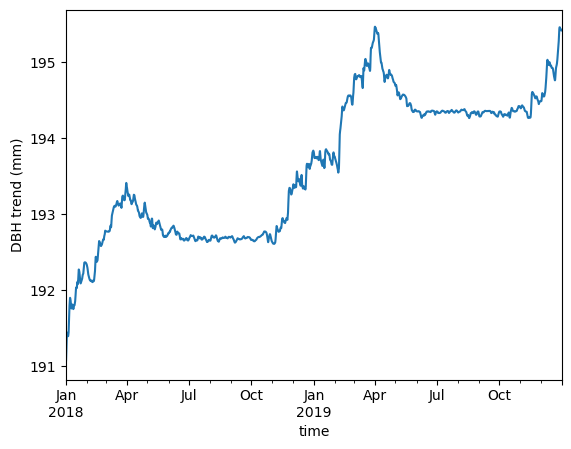

In [7]:
tree.trend().plot(ylabel='DBH trend (mm)')

<Axes: xlabel='time', ylabel='GRO (mm)'>

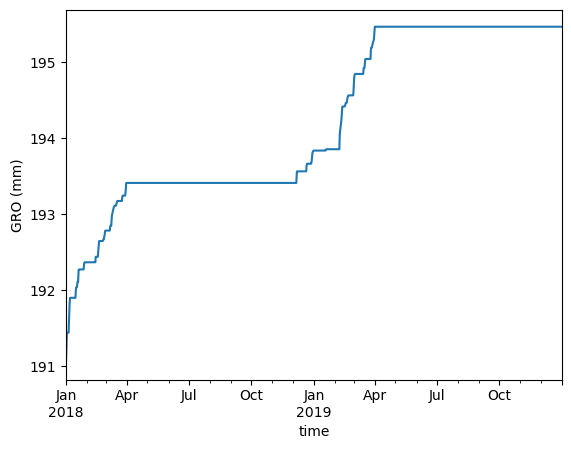

In [8]:
tree.GRO().plot(ylabel='GRO (mm)')

<Axes: xlabel='time', ylabel='TWD (mm)'>

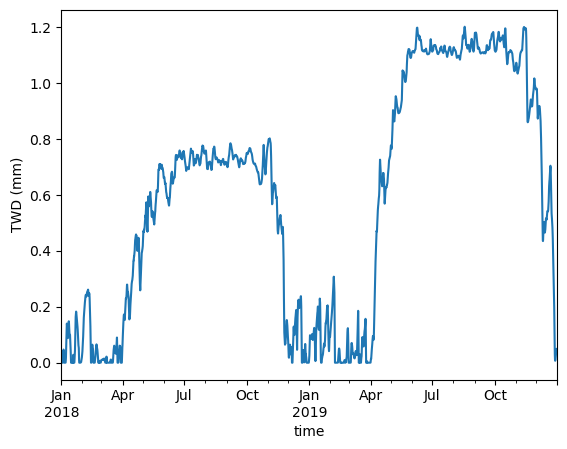

In [9]:
tree.TWD().plot(ylabel='TWD (mm)')

<Axes: xlabel='time', ylabel='GRO rate (mm/day)'>

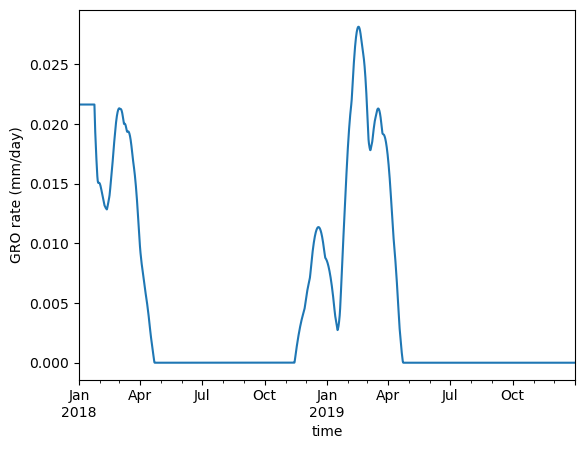

In [10]:
tree.GRO_rate().plot(ylabel='GRO rate (mm/day)')

In the plot above, the **GRO rate** appears unchanged at the beginning. This is due to the nature of the rolling window applied, which is set to 45 days. During the initial 22–23 days (i.e., the first half of the window), the rolling window does not yet encompass a full 45-day period, resulting in incomplete averaging and consequently a flat or less variable trend. The same phenomenon occurs at the end of the time series.

<Axes: xlabel='time', ylabel='$\\Omega$'>

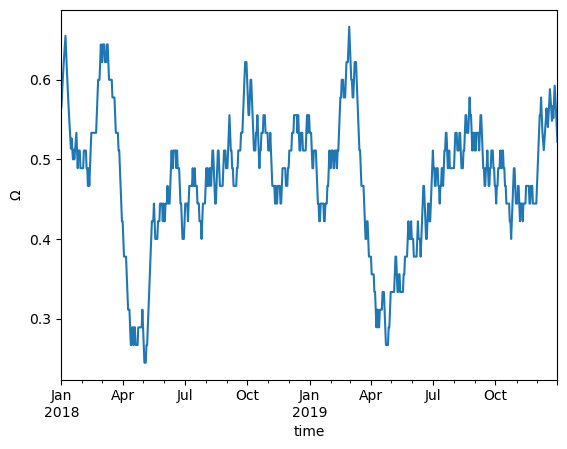

In [11]:
tree.omega().plot(ylabel='$\Omega$')

<Axes: xlabel='time', ylabel='T-REX (days)'>

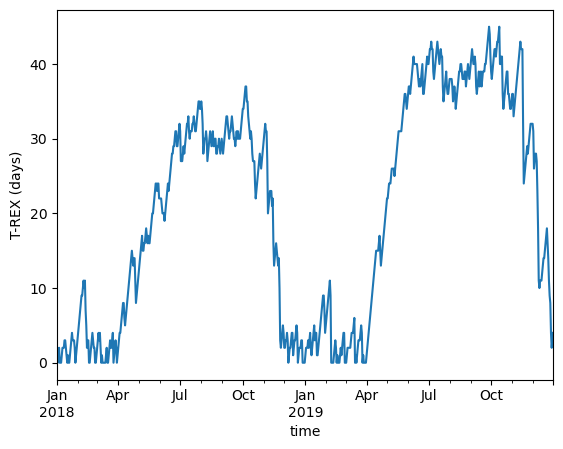

In [12]:
tree.TREX().plot(ylabel='T-REX (days)')

<Axes: xlabel='time', ylabel='T-REX slope'>

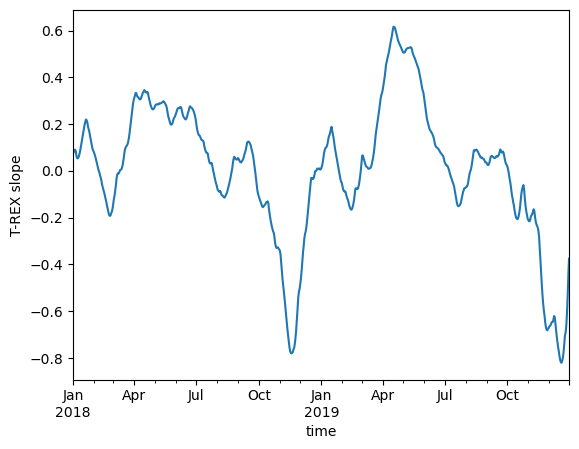

In [13]:
tree.rolling_TREX_slope().plot(ylabel='T-REX slope')

<Axes: xlabel='time', ylabel='DBH slope (mm/day)'>

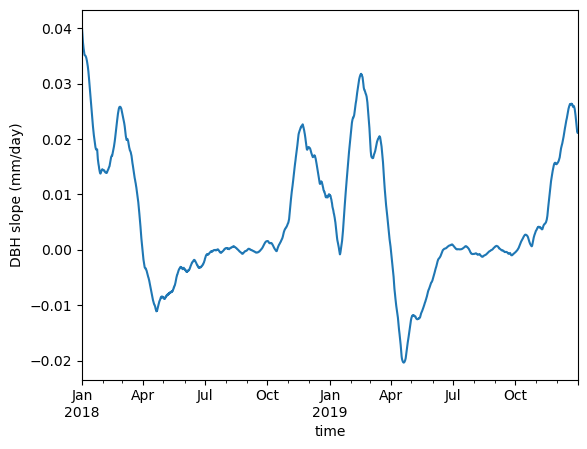

In [14]:
tree.rolling_dbh_slope().plot(ylabel='DBH slope (mm/day)')

In the cell below we utilize a the built in function `slope` to calculate the DBH slope of a given time window. This is the same method performed in Feuer et al. (2025) to calculate the DBH slope in response to a given atmospheric event. 



In [15]:
start = '2019-01-01'
end = '2019-02-01'
slope = tree.slope(tree.data[start:end]) * tree.points_per_day

print(f'The DBH slope between {start} and {end} is {slope:.5f} mm/day')

The DBH slope between 2019-01-01 and 2019-02-01 is 0.00024 mm/day


The Figure below plots all data from the `df_all` dataframe. 

(17532.0, 18261.979166666668)

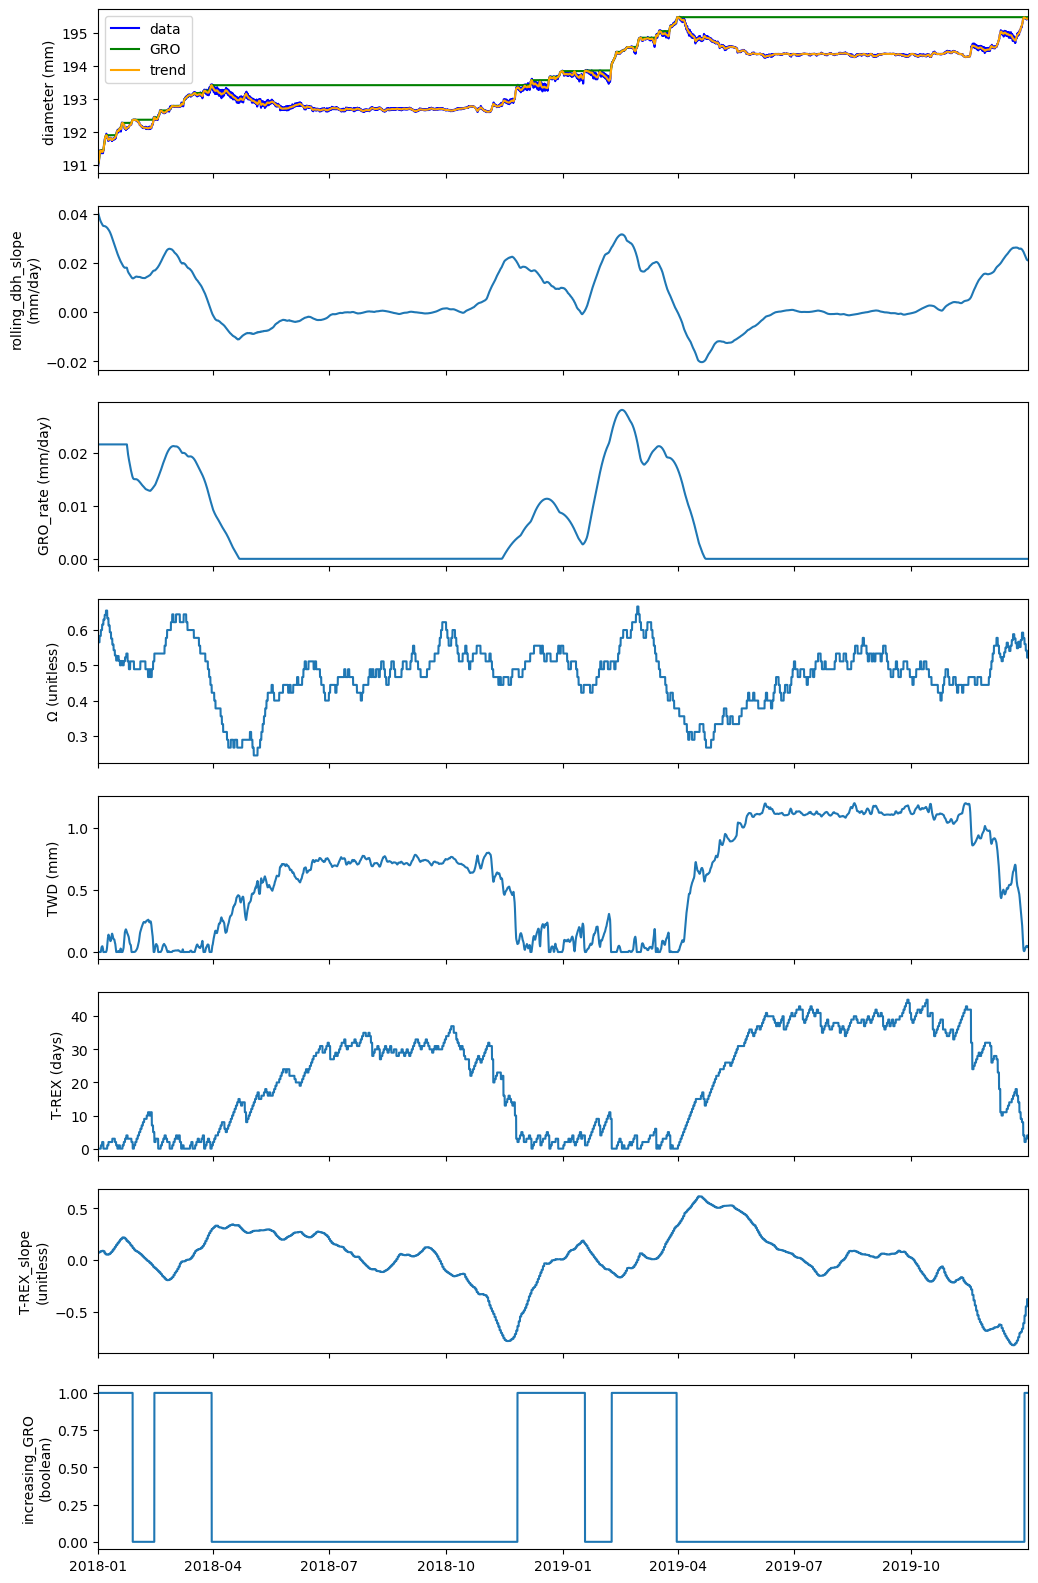

In [16]:

fig, ax = plt.subplots(8, 1, figsize=(12, 20), sharex=True)

ax[0].plot(df_all['data'], label='data', color='b')
ax[0].plot(df_all['GRO'], label='GRO', color='green')
ax[0].plot(df_all['trend'], label='trend', color='orange')
ax[0].set(ylabel='diameter (mm)')
ax[0].legend()

ax[1].plot(df_all['rolling_dbh_slope'], label='rolling_dbh_slope')
ax[1].set(ylabel='rolling_dbh_slope\n(mm/day)')

ax[2].plot(df_all['GRO_rate'], label='GRO_rate') 
ax[2].set(ylabel='GRO_rate (mm/day)')

ax[3].plot(df_all['omega'], label='omega')
ax[3].set(ylabel='$\Omega$ (unitless)')

ax[4].plot(df_all['TWD'], label='TWD')
ax[4].set(ylabel='TWD (mm)')

ax[5].plot(df_all['TREX'], label='TREX')
ax[5].set(ylabel='T-REX (days)')

ax[6].plot(df_all['TREX_slope'], label='TREX_slope')
ax[6].set(ylabel='T-REX_slope\n(unitless)')

ax[7].plot(df_all['increasing_GRO'].astype(int), label='increasing_GRO')
ax[7].set(ylabel='increasing_GRO\n(boolean)')

ax[7].set_xlim(df_all.index[0], df_all.index[-1])


The code below generates a plot of GRO rate, $\Omega$ and T-REX along with the growth modes time series for the example tree. This figure is similar to Figure 4 shown in the paper. 

Text(0.97, 0.095, 'recovery')

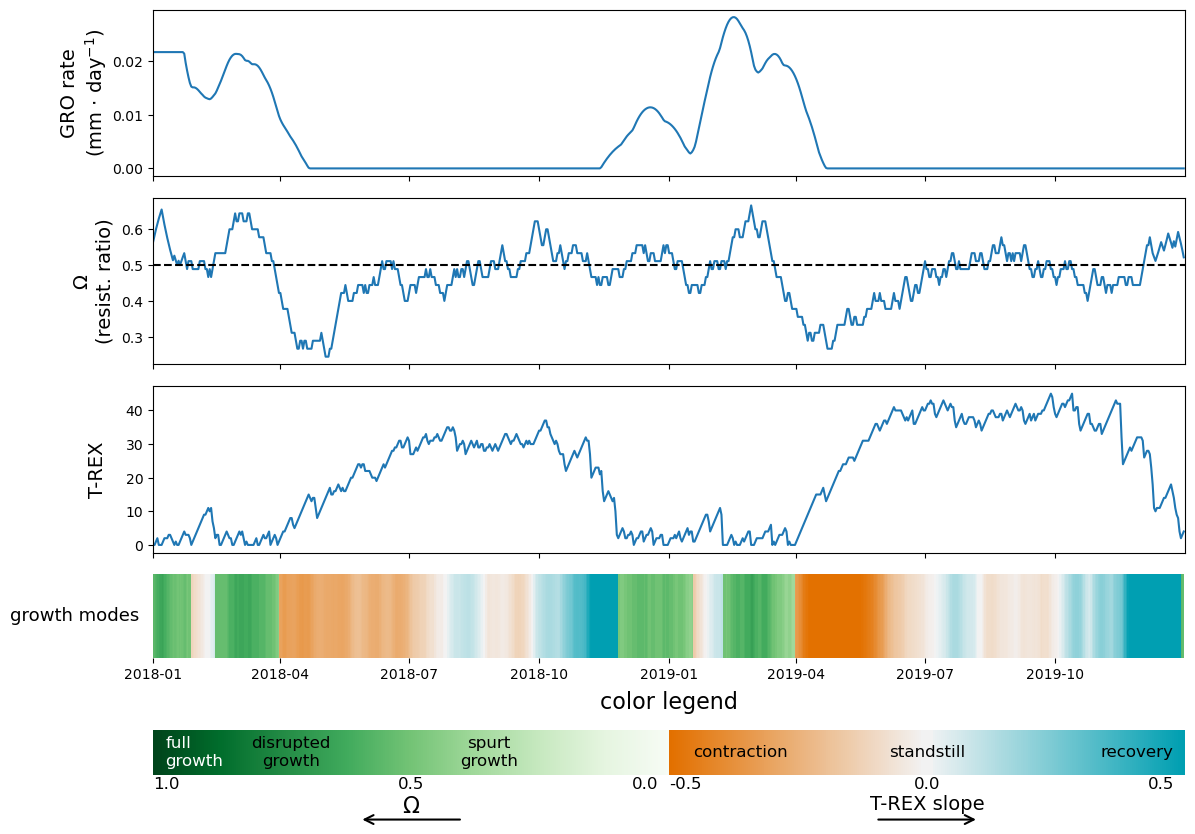

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.collections as mcollections
import matplotlib.dates as mdates
import numpy as np


angl = 30
my_cmap_r = sns.diverging_palette(angl, angl+180, s=100, l=60, sep=6, center="light", as_cmap=True)

fig, ax = plt.subplots(4, 1, figsize=(12, 9), sharex=True, gridspec_kw={'height_ratios': [2, 2, 2, 1]})
fig.subplots_adjust(left=0.12, right=0.98, top=0.92, bottom=0.20,
                    hspace=0.15, wspace=0.02)


# Define color maps and normalization
angl = 30
my_cmap = sns.diverging_palette(angl+180, angl, s=100, l=60, sep=6, center="light", as_cmap=True)
cmap_growth = plt.get_cmap("Greens")  # For growth (resistance-based)
cmap_decline = my_cmap  # For non-growth (TREX_slope-based)

norm_resistance = mcolors.Normalize(vmin=0, vmax=1)  # Normalize resistance (0 to 1)
norm_trex = mcolors.TwoSlopeNorm(vmin=-0.5, vcenter=0, vmax=0.5)  # Diverging colormap for TREX_slope


tree_df = df_all.copy()
tree_df = tree_df.resample('1D').mean()
color = "tab:blue"

# Original plots
alpha = 1
ax[0].plot(tree_df.index, tree_df['GRO_rate'], color=color, label=tree, alpha=alpha)
ax[0].set_ylabel('Growth rate', va='center')
ax[0].set_ylabel(r'GRO rate' '\n' r'(mm $\cdot$ day$^{-1}$)', labelpad=20, fontsize=14)

ax[1].plot(tree_df.index, tree_df['omega'], color=color, label=tree, alpha=alpha)
ax[1].set_ylabel(r"$\Omega$"+ '\n(resist. ratio)', va='center', labelpad=20, fontsize=14)

ax[2].plot(tree_df.index, tree_df['TREX'], color=color, label=tree, alpha=alpha)
ax[2].set_ylabel(r'T-REX', va='center', labelpad=20, fontsize=14)

ax[1].axhline(0.5, color='black', linestyle='--')



# Background shading for growth and non-growth phases
# Convert timestamps to numeric values for PolyCollection
tree_df["date_num"] = mdates.date2num(tree_df.index)

for i in range(len(tree_df) - 1):
    start_time = tree_df["date_num"].iloc[i]
    end_time = tree_df["date_num"].iloc[i + 1]

    if tree_df.iloc[i]['increasing_GRO']:  # Growth phase -> color by resistance (Greens)
        resistance_value = tree_df.iloc[i]["omega"]
        color = cmap_growth(norm_resistance(resistance_value))
    else:  # Non-growth phase -> color by TREX_slope (RdBu)
        trex_slope_value = tree_df.iloc[i]["TREX_slope"]
        color = cmap_decline(norm_trex(trex_slope_value))

    # Create a vertical polygon representing the time span
    verts = [
        (start_time, 0), 
        (start_time, 1), 
        (end_time, 1), 
        (end_time, 0)
    ]
    poly = mcollections.PolyCollection([verts], facecolors=[color], alpha=1, lw=0)

    # Add polygon to the axis
    ax[3].add_collection(poly)

# Hide unnecessary axis labels on shading axes
for i in range(3, 4):
    ax[i].spines['top'].set_visible(False)
    ax[i].spines['bottom'].set_visible(False)
    ax[i].spines['left'].set_visible(False)
    ax[i].spines['right'].set_visible(False)
    ax[i].set_yticks([])


ax[3].set_ylabel("growth modes", rotation=0, labelpad=10, va='center', ha='right', fontsize=13)



bbox_0 = ax[0].get_position().extents   # left, bottom, right, and top

middle_x = (bbox_0[0] + bbox_0[2]) / 2

# create a background axis (spanning desired width and height)
ax_bg1 = fig.add_axes([bbox_0[0],                 # left
                       0.07,  # bottom
                       middle_x - bbox_0[0],    # width
                       0.05],                  # height
                      zorder=-1000)  # [left, bottom, width, height]
ax_bg2 = fig.add_axes([middle_x,                 # left
                       0.07,  # bottom
                       middle_x - bbox_0[0],    # width
                       0.05],                  # height
                      zorder=-1000)  # [left, bottom, width, height]
# create a smooth color gradient (wider to match the aspect)
gradient = np.linspace(0, 1, 256).reshape(1, -1)  # 1-row gradient
gradient = np.tile(gradient, (50, 1))  # Stretch it vertically
ax_bg1.imshow(gradient, aspect='auto', cmap='Greens_r', norm=mcolors.Normalize(vmin=0, vmax=1))
ax_bg2.imshow(gradient, aspect='auto', cmap=my_cmap_r, norm=mcolors.Normalize(vmin=0, vmax=1))

ax_bg1.text(0, -0.05, "1.0", color='black', fontsize=12,
            transform=ax_bg1.transAxes,
            verticalalignment='top', horizontalalignment='left')
ax_bg1.text(0.5, -0.05, "0.5", color='black', fontsize=12,
            transform=ax_bg1.transAxes,
            verticalalignment='top', horizontalalignment='center')
ax_bg1.text(0.98, -0.05, "0.0", color='black', fontsize=12,
            transform=ax_bg1.transAxes,
            verticalalignment='top', horizontalalignment='right')
ax_bg1.text(0.5, -0.45, r"$\Omega$", color='black', fontsize=16,
            transform=ax_bg1.transAxes,
            verticalalignment='top', horizontalalignment='center')
ax_bg1.annotate(
    text='',                      # the label above the arrow
    xy=(0.4, -1.0),                # arrow head (end point), in axes coords
    xytext=(0.6, -1.0),           # arrow tail (start point)
    textcoords='axes fraction',
    xycoords='axes fraction',
    arrowprops=dict(
        arrowstyle='->',
        color='black',
        lw=1.5,
    ),
    ha='center',
    va='bottom',
    fontsize=16,
)

ax_bg2.text(0, -0.05, "-0.5", color='black', fontsize=12,
            transform=ax_bg2.transAxes,
            verticalalignment='top', horizontalalignment='left')
ax_bg2.text(0.5, -0.05, "0.0", color='black', fontsize=12,
            transform=ax_bg2.transAxes,
            verticalalignment='top', horizontalalignment='center')
ax_bg2.text(0.98, -0.05, "0.5", color='black', fontsize=12,
            transform=ax_bg2.transAxes,
            verticalalignment='top', horizontalalignment='right')
ax_bg2.text(0.5, -0.45, r"T-REX slope", color='black', fontsize=14,
            transform=ax_bg2.transAxes,
            verticalalignment='top', horizontalalignment='center')
ax_bg2.annotate(
    text='',                      # the label above the arrow
    xy=(0.6, -1.0),                # arrow head (end point), in axes coords
    xytext=(0.4, -1.0),           # arrow tail (start point)
    textcoords='axes fraction',
    xycoords='axes fraction',
    arrowprops=dict(
        arrowstyle='->',
        color='black',
        lw=1.5,
    ),
    ha='center',
    va='bottom',
    fontsize=16,
)

ax[0].set_xlim(tree.start, tree.end)

# remove ticks and labels to make it look like a colorbar
ax_bg1.set_xticks([])
ax_bg1.set_yticks([])
ax_bg1.set_frame_on(False)
ax_bg2.set_xticks([])
ax_bg2.set_yticks([])
ax_bg2.set_frame_on(False)
# write text with respect to fig coords
fig.text(middle_x, 0.15, 'color legend', fontsize=16, verticalalignment='center', horizontalalignment='center')
fig.text(bbox_0[0]+0.01, 0.095, 'full\ngrowth', fontsize=12, verticalalignment='center', horizontalalignment='left', color='white')
fig.text((bbox_0[0]+middle_x)/2-0.10, 0.095, 'disrupted\ngrowth', fontsize=12, verticalalignment='center', horizontalalignment='center', color='black')
fig.text(middle_x-0.15, 0.095, 'spurt\ngrowth', fontsize=12, verticalalignment='center', horizontalalignment='center', color='black')
fig.text(middle_x+0.02, 0.095, 'contraction', fontsize=12, verticalalignment='center', horizontalalignment='left', color='black')
fig.text((bbox_0[2]+middle_x)/2, 0.095, 'standstill', fontsize=12, verticalalignment='center', horizontalalignment='center', color='black')
fig.text(bbox_0[2]-0.01, 0.095, 'recovery', fontsize=12, verticalalignment='center', horizontalalignment='right', color='black')
